# Week-09

In [1]:
# getwd() #ディレクトリ確認getwd() #ディレクトリ確認

In [2]:
# # setwd() に入れる Path は上記のディレクトリの下の data ファイル
# setwd("C:/Users/iiats/OneDrive/デスクトップ/１００本ノックチャレンジ/03_R_100_knocks/Questions/data") 
# getwd() #ディレクトリ確認

In [3]:
# DataFrameの準備
# 相対パスでデータを読み込む
df <- read.csv("./data/titanic3.csv", header=T)
df2 <- read.csv("./data/data1.csv", header=T)
df3 <- read.csv("./data/data1_2.csv", header=T)
df4 <- read.csv("./data/data1_3.csv", header=T)
df5 <- read.csv("./data/data2.csv", header=T, fileEncoding = "CP932")

# ラベリング (80 - 81)

In [4]:
# 【80】
# dfのsex列をラベルエンコーディングし、
# dfの先頭5行を表示
# (from sklearn.preprocessing import LabelEncoderをインポート)

# LabelEncoderというものがあるがインストールの仕方が分からないので断念
# https://www.rdocumentation.org/packages/superml/versions/0.5.3/topics/LabelEncoder
# https://github.com/saraswatmks/superml/tree/master/R
# lbl = LabelEncoder$new()
# df$sex <- lbl$fit_transform(df$sex)
# head(df)

In [5]:
# male を 0 に、women を 1 に変換する問題とする
# 【55】を参照
df["sex"] <- lapply(df["sex"], gsub, pattern="female", replacement = "1")
df["sex"] <- lapply(df["sex"], gsub, pattern="male", replacement = "0") # 順番を間違えると fe0 となってしまう。
head(df)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [6]:
# 【81】
# dfのsex列をOne-hotエンコーディングし、
# dfの先頭5行を表示

df <- read.csv("./data/titanic3.csv", header=T)

# 前処理大全p208より。
# install.packages("caret")
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [7]:
dummy_model <- dummyVars(~sex, data=df, fullRank=FALSE)
df_dummy <- predict(dummy_model, df)
head(df_dummy)

sex.female,sex.male
1,0
0,1
1,0
0,1
1,0
0,1


In [8]:
df_dummy2 <- cbind(df, df_dummy)
head(df_dummy2)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex.female,sex.male
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO",1,0
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON",0,1
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",1,0
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON",0,1
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",1,0
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY",0,1


# プロット (82 - 89)

In [9]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 3, repr.plot.height = 3) 

In [10]:
df <- read.csv("./data/titanic3.csv", header=T)
head(df)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


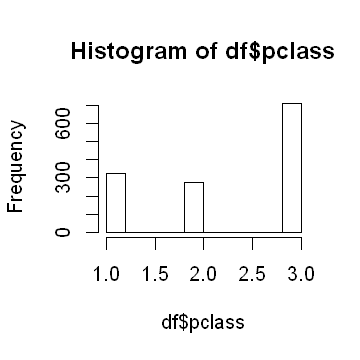

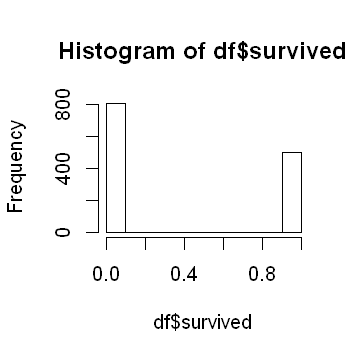

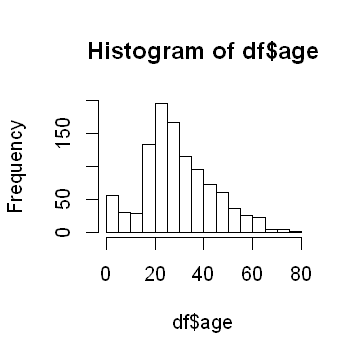

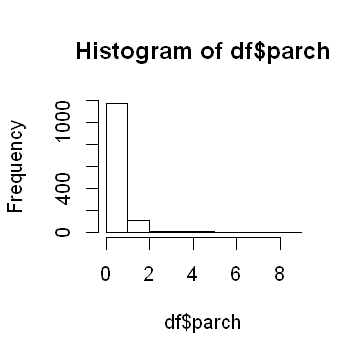

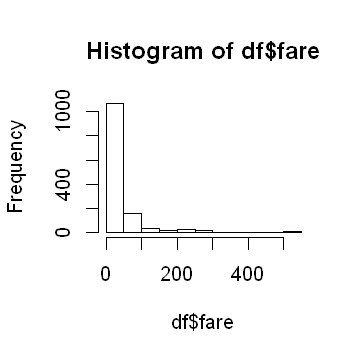

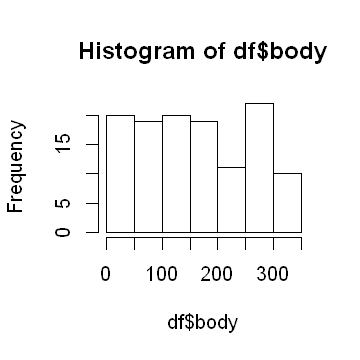

In [11]:
# 【82】
# dfのすべての数値列のヒストグラムを表示

# 全部を一度に描く方法が分からなかったので、順次表示
hist(df$pclass)
hist(df$survived)
hist(df$age)
hist(df$parch)
hist(df$fare)
hist(df$body)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 263 rows containing non-finite values (stat_bin)."

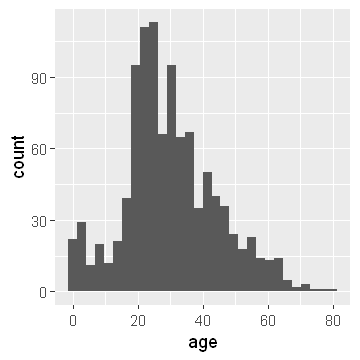

In [12]:
# 【83】
# dfのage列をヒストグラムで表示

# https://www.r-graph-gallery.com/220-basic-ggplot2-histogram.html
g <- ggplot(df, aes(x = age))
g <- g + geom_histogram()
plot(g)

In [13]:
# 【84】
# df2のname列の要素ごとの3科目合計得点を棒グラフで表示

head(df2)

name,class,English,Mathmatics,History
A,1,80,55,65
B,1,55,100,83
C,2,65,70,95
D,1,40,63,70
E,2,76,82,79
F,2,93,68,81


In [14]:
df_tmp <- df2[c("English", "Mathmatics", "History")]
sum <- apply(df_tmp, 1, sum)
df_tmp2 <- cbind(df2, sum)
head(df_tmp2)

name,class,English,Mathmatics,History,sum
A,1,80,55,65,200
B,1,55,100,83,238
C,2,65,70,95,230
D,1,40,63,70,173
E,2,76,82,79,237
F,2,93,68,81,242


In [15]:
df_tmp3 <- df_tmp2[c("name", "sum")]
head(df_tmp3)

name,sum
A,200
B,238
C,230
D,173
E,237
F,242


In [16]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 4, repr.plot.height = 4) 

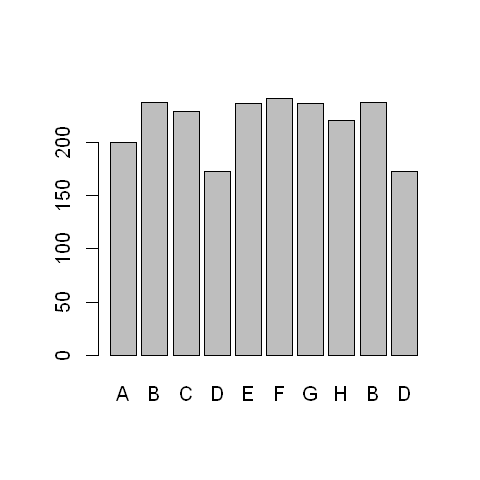

In [17]:
# https://symfoware.blog.fc2.com/blog-entry-1508.html
barplot(df_tmp3[,2], names.arg=df_tmp3$name)

In [18]:
# 【85】
# df2のname列の要素ごとの3科目を棒グラフで
# 並べて表示

df2 <- read.csv("./data/data1.csv", header=T)
df_tmp <- as.matrix(t(df2[c(-1,-2)]))
colnames(df_tmp) <- df2$name
head(df_tmp)

,A,B,C,D,E,F,G,H,B,D
English,80,55,65,40,76,93,100,73,55,40
Mathmatics,55,100,70,63,82,68,85,52,100,63
History,65,83,95,70,79,81,52,96,83,70


In [19]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 6, repr.plot.height = 6) 

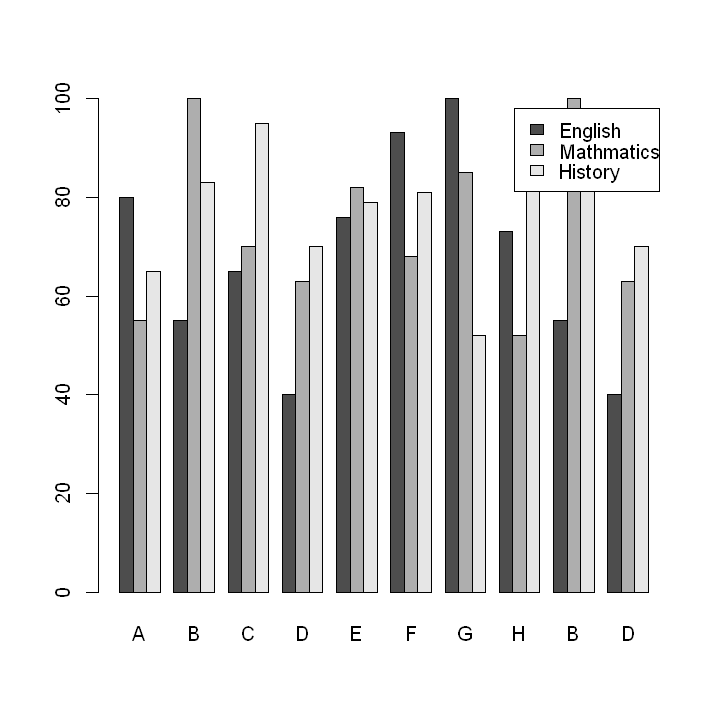

In [20]:
# http://www.isc.meiji.ac.jp/~mizutani/R/spread/basic_graphics.html
barplot(df_tmp, beside = TRUE, legend = rownames(df_tmp))

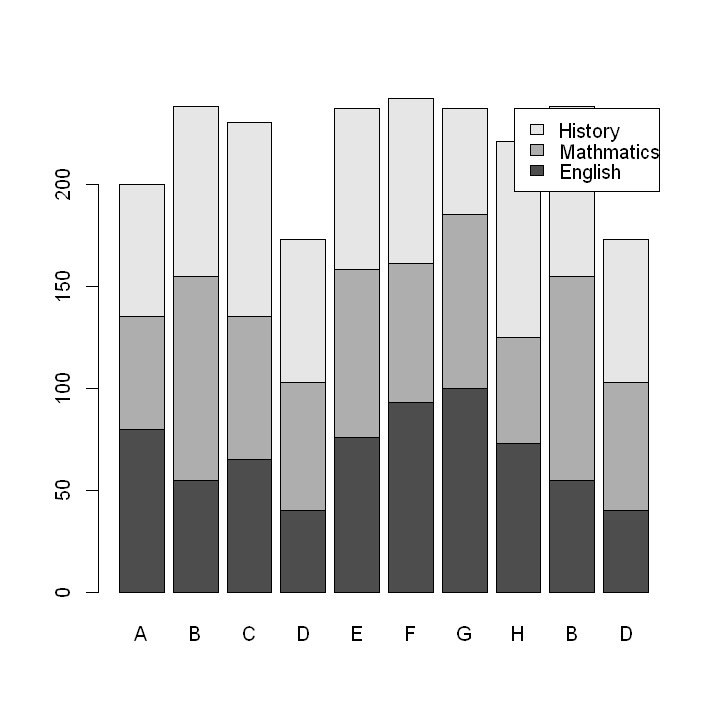

In [21]:
# 【86】
# df2のname列の要素ごとの3科目を積み上げ棒グラフで表示

barplot(df_tmp, legend = rownames(df_tmp))

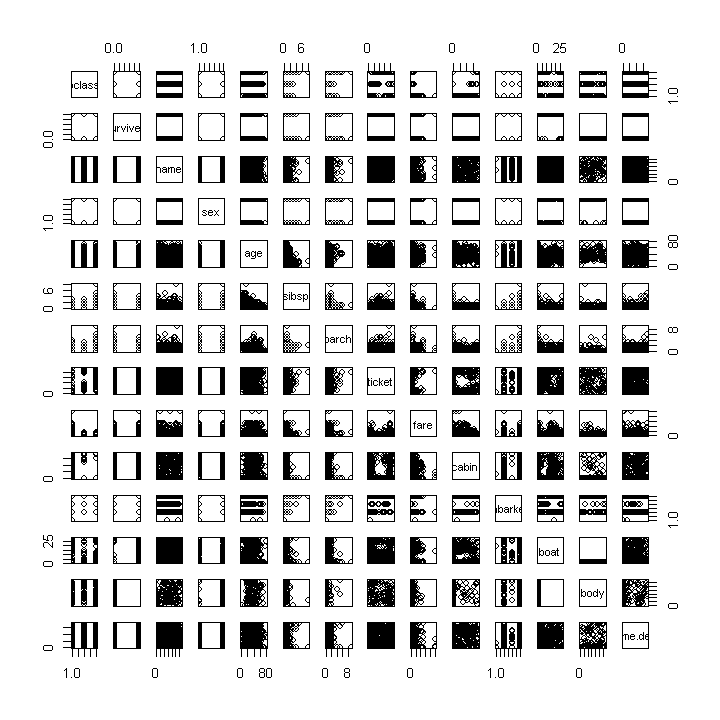

In [22]:
# 【87】
# dfの各列間の散布図を表示
# (from pandas.plotting import scatter_matrixをインポート)

pairs(df)

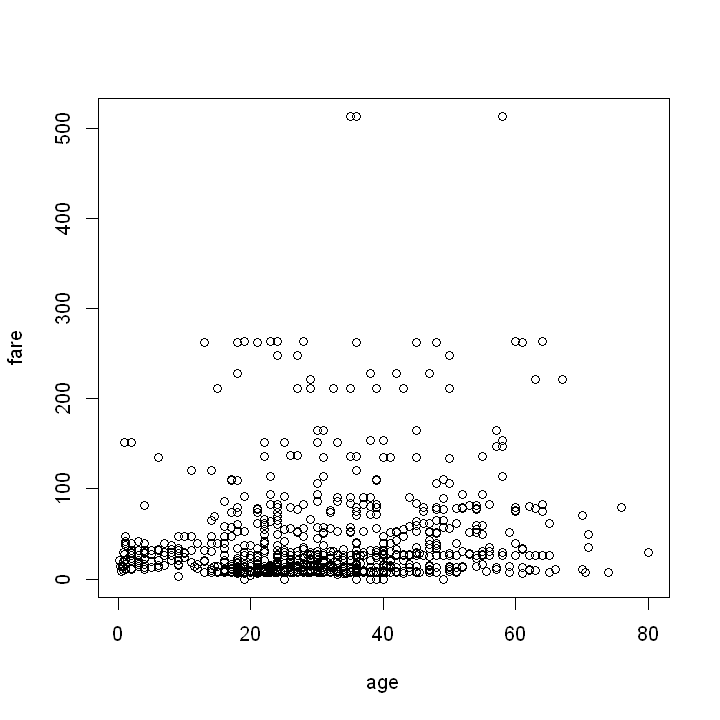

In [23]:
# 【88】
# dfのage列とfare列で散布図を作成

age <- df$age
fare <- df$fare
plot(age, fare)

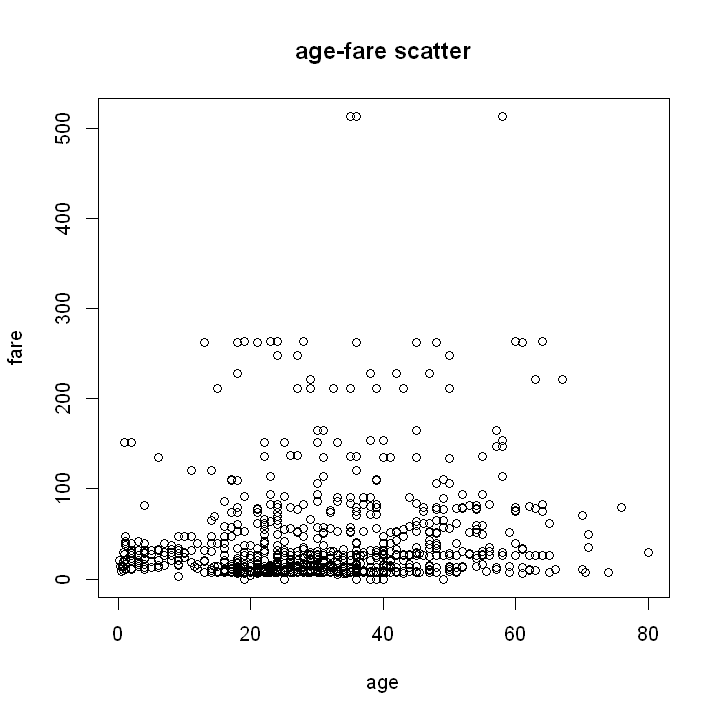

In [24]:
# 【89】
# 【88】で描画したグラフに「age-fare scatter」という
# グラフタイトルをつける

plot(age, fare, main="age-fare scatter")